In [5]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [20]:
# Check the name of the current directory
current_dir = !pwd
print(current_dir)

file_list = !ls
print(file_list)

dataset_list = !ls datasets
print(dataset_list)

# View the first 20 lines of datasets/road-accidents.csv
accidents_head = !head -n 20 datasets/road-accidents.csv
accidents_head

['c:\\Users\\biern\\Desktop\\Data\\Portfolio\\Machine Learning\\Reducing Traffic Mortality in the USA']
['datasets', 'notebook.ipynb']
['miles-driven.csv', 'road-accidents.csv']


['##### LICENSE #####',
 '# This data set is modified from the original at fivethirtyeight (https://github.com/fivethirtyeight/data/tree/master/bad-drivers)',
 '# and it is released under CC BY 4.0 (https://creativecommons.org/licenses/by/4.0/)',
 '##### COLUMN ABBREVIATIONS #####',
 '# drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)',
 '# perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)',
 '# perc_fatl_alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)',
 '# perc_fatl_1st_time = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)',
 '##### DATA BEGIN #####',
 'state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_1st_time',
 'Alabama|18.8|39|30|80',
 'Alaska|18.1|41|25|94',
 'Arizona|18.6|35|28|96',
 'Arkansas|22.4|18|26|95',
 'California|12|35|28|89',
 'Colorado|13.6|37|28|95',

## 2. Read in and get an overview of the data

In [21]:
import pandas as pd

# Read in `road-accidents.csv`
car_acc = pd.read_csv("datasets/road-accidents.csv",comment = "#",sep ="|" )

rows_and_cols = car_acc.shape
print('There are {} rows and {} columns.\n'.format(
    rows_and_cols[0], rows_and_cols[1]))

car_acc_information = car_acc.info()
print(car_acc_information)

# Display the last five rows of the DataFrame
car_acc.tail()

There are 51 rows and 5 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
None


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
46,Virginia,12.7,19,27,88
47,Washington,10.6,42,33,86
48,West Virginia,23.8,34,28,87
49,Wisconsin,13.8,36,33,84
50,Wyoming,17.4,42,32,90


## 3. Create a textual and a graphical summary of the data

       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time  
count            51.00000  
mean             88.72549  
std               6.96011  
min              76.00000  
25%              83.50000  
50%              88.00000  
75%              95.00000  
max             100.00000  


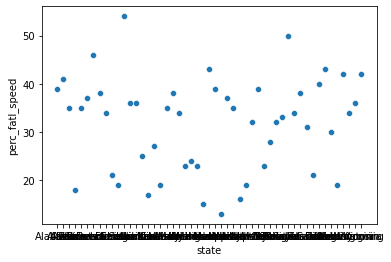

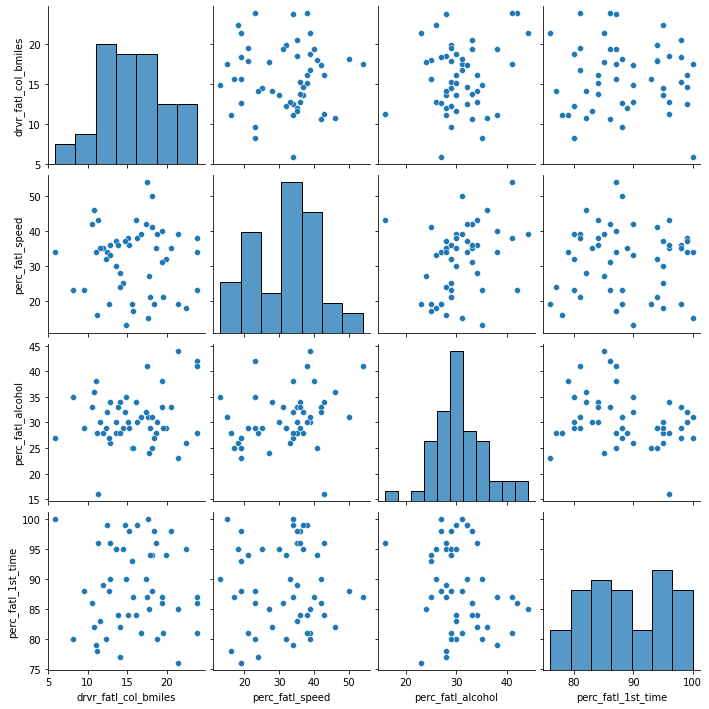

In [7]:
# import seaborn and make plots appear inline
import seaborn as sns
%matplotlib inline

# Compute the summary statistics of all columns in the `car_acc` DataFrame
sum_stat_car = car_acc.describe()
print(sum_stat_car)

car_acc.head()

sns.scatterplot(x ="state",y="perc_fatl_speed", data = car_acc)
sns.pairplot(car_acc)


## 4. Quantify the association of features and accidents

<ul>
<li>0.2 = weak</li>
<li>0.5 = medium</li>
<li>0.8 = strong</li>
<li>0.9 = very strong</li>
</ul>

In [8]:

corr_columns = car_acc.corr()
corr_columns

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


## 5. Fit a multivariate linear regression

In [9]:
car_acc.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [10]:
# Import the linear model function from sklearn
from sklearn import linear_model

# Create the features and target DataFrames
features = car_acc.drop(["drvr_fatl_col_bmiles","state"], axis = 1)
target = car_acc["drvr_fatl_col_bmiles"]

reg = linear_model.LinearRegression()

reg.fit(features,target)

# Retrieve the regression coefficients
fit_coef = reg.coef_
fit_coef

array([-0.04180041,  0.19086404,  0.02473301])

## 6. Perform PCA on standardized data

The cumulative variance of the first two principal componenets is 0.7947


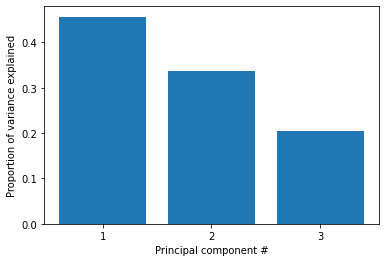

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(features_scaled)

import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[1]
print("The cumulative variance of the first two principal componenets is {}".format(
    round(two_first_comp_var_exp, 5)))

## 7. Visualize the first two principal components

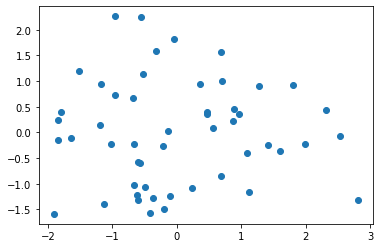

In [13]:
pca = PCA(n_components = 2)
p_comps = pca.fit_transform(features_scaled)


p_comp1 = p_comps[:,0]
p_comp2 = p_comps[:,1]

plt.scatter(p_comp1,p_comp2 )

## 8. Find clusters of similar states in the data

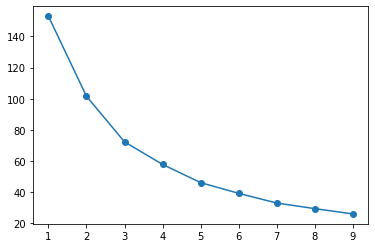

In [14]:
from sklearn.cluster import KMeans

# A loop will be used to plot the explanatory power for up to 10 KMeans clusters
ks = range(1, 10)
inertias = []
for k in ks:

    km = KMeans(n_clusters=k, random_state=8)
    km.fit(features_scaled)
    inertias.append(km.inertia_)
    
# Plot the results in a line plot
plt.plot(ks, inertias, marker='o')

## 9. KMeans to visualize clusters in the PCA scatter plot

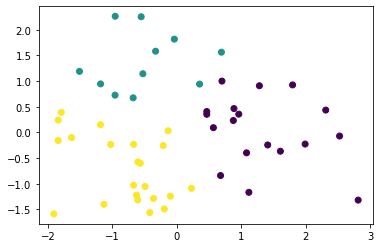

In [16]:
km = KMeans(n_clusters=3, random_state=8)
km.fit(features_scaled)
plt.scatter(p_comps[:, 0], p_comps[:, 1], c=km.labels_)

## 10. Visualize the feature differences between the clusters


<AxesSubplot:xlabel='percent', ylabel='measurement'>

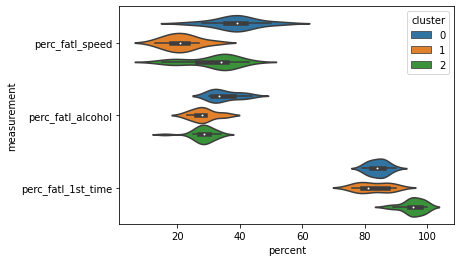

In [17]:

car_acc['cluster'] = km.labels_

melt_car = pd.melt(car_acc, id_vars='cluster', var_name='measurement', value_name='percent',
                   value_vars=['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time'])


sns.violinplot(y='measurement', x='percent', data=melt_car, hue='cluster')

## 11. Compute the number of accidents within each cluster


,count,mean,sum
cluster,,,
0,18,911.406439,16405.3159
1,11,860.505945,9465.5654
2,22,898.378595,19764.3291


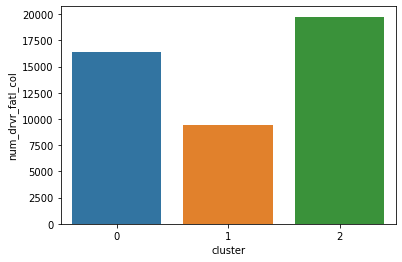

In [18]:
miles_driven = pd.read_csv('datasets/miles-driven.csv', sep='|')
car_acc_miles = car_acc.merge(miles_driven, on='state')
car_acc_miles['num_drvr_fatl_col'] = car_acc_miles['drvr_fatl_col_bmiles'] * car_acc_miles['million_miles_annually'] / 1000

sns.barplot(x='cluster', y='num_drvr_fatl_col', data=car_acc_miles, estimator=sum, ci=None)

count_mean_sum = car_acc_miles.groupby('cluster')['num_drvr_fatl_col'].agg(['count', 'mean', 'sum'])
count_mean_sum